In [1]:
from fft import *
import matplotlib.pyplot as plt

In [ ]:
def linear_convolution_direct(x, h):
    """
    Compute the linear convolution of x and h using np.convolve.
    This yields an output of length len(x)+len(h)-1.
    """
    return np.convolve(x, h, mode='full')

def linear_convolution_fft(x, h):
    """
    Compute the linear convolution using the FFT.
    Both x and h are zero-padded to length N = len(x)+len(h)-1 before
    computing the FFTs, so that the circular convolution computed via FFT
    corresponds to the linear convolution.
    """
    N = len(x) + len(h) - 1
    X = FFT(np.pad(x, (0, N - len(x))))
    H = FFT(np.pad(h, (0, N - len(h))))
    Y = IFFT(X * H)
    return Y

def arrays_almost_equal(a, b, tol=1e-6):
    """
    Checks if two input arrays are almost equal element-wise.
    """
    return np.allclose(a, b, atol=tol)

In [3]:
def convolution(x, h):
    """
    For now, let's start by assuming that x and h are the same size
    """
    n = len(x)
    y = np.zeros(n, dtype=complex)
    for k in range(n):
        for m in range(n):
            y[k] += x[m] * h[(k - m) % n]
    return y

def arrays_almost_equal(a, b, tol=1e-6):
    """
    Checks if the two input lists a and b are almost equal or not, with respect to a given tolerance "tol"
    """
    return np.allclose(a, b, atol=tol)

## Test 1: FFT and IFFT Correctness

Generate a random signal of arbitrary length, compute its FFT and then its IFFT, and verify that the recovered signal is close to the original.

In [4]:
x = np.random.random(10) + 1j * np.random.random(10)
X = FFT(x)
x_rec = IFFT(X)
print('Original signal:', x)
print('Recovered signal:', x_rec)
print('FFT/IFFT recovery successful:', arrays_almost_equal(x, x_rec))

Original signal: [0.01756006+0.35290524j 0.91245679+0.06647868j 0.27361665+0.82172675j
 0.08733739+0.0986097j  0.59911488+0.58926166j 0.23960469+0.32650351j
 0.48489783+0.01008091j 0.54748749+0.84707927j 0.21996527+0.88240559j
 0.60468363+0.19332099j]
Recovered signal: [0.01756006+0.35290524j 0.91245679+0.06647868j 0.27361665+0.82172675j
 0.08733739+0.0986097j  0.59911488+0.58926166j 0.23960469+0.32650351j
 0.48489783+0.01008091j 0.54748749+0.84707927j 0.21996527+0.88240559j
 0.60468363+0.19332099j]
FFT/IFFT recovery successful: True


## Test 2: Convolution and Multiplication Relationship

For two signals `x` and `h`, the convolution computed directly in the time domain should equal the result obtained by:

1. Computing the FFT of both signals
2. Multiplying the resulting spectra element-wise
3. Applying the IFFT to the product.

I perform both computations and compare the results.

In [ ]:
signal_length = 64
filter_length = 8
signal = np.random.random(signal_length) + 1j * np.random.random(signal_length)
filter = np.random.random(filter_length) + 1j * np.random.random(filter_length)

y_direct = linear_convolution_direct(signal, filter)
y_fft = linear_convolution_fft(signal, filter)

print('\nDirect linear convolution:', y_direct)
print('\nFFT-based linear convolution:', y_fft)
print('\nConvolution and multiplication relationship holds:', arrays_almost_equal(y_direct, y_fft))


Direct linear convolution: [8.23345536e-02 4.33361442e-01 6.23922610e-01 7.44599416e-01
 9.24390588e-01 1.14078292e+00 1.14525623e+00 1.02944139e+00
 8.51428950e-01 7.12549062e-01 7.78989753e-01 6.96621381e-01
 8.95522559e-01 1.11348515e+00 1.35891871e+00 1.44139488e+00
 1.42882855e+00 1.37363670e+00 1.32962844e+00 1.29571545e+00
 1.16713464e+00 9.41962124e-01 1.03326177e+00 1.15425955e+00
 1.06399884e+00 9.38382152e-01 8.59436734e-01 8.34599879e-01
 9.09819553e-01 6.99125449e-01 6.36032673e-01 5.63270435e-01
 8.12890965e-01 9.02016529e-01 8.36375736e-01 1.05869439e+00
 1.24285984e+00 1.16927184e+00 9.56040336e-01 1.07996625e+00
 1.22515066e+00 1.00818004e+00 7.45551663e-01 8.73010498e-01
 1.13057988e+00 1.16210943e+00 1.12292376e+00 1.07259127e+00
 1.37199173e+00 1.39811302e+00 1.11942481e+00 9.42649447e-01
 8.21132570e-01 8.08352342e-01 7.84646032e-01 6.67541990e-01
 6.72373152e-01 9.17165624e-01 1.15411654e+00 1.02093887e+00
 9.14132082e-01 8.62447027e-01 9.09303774e-01 9.35823232e

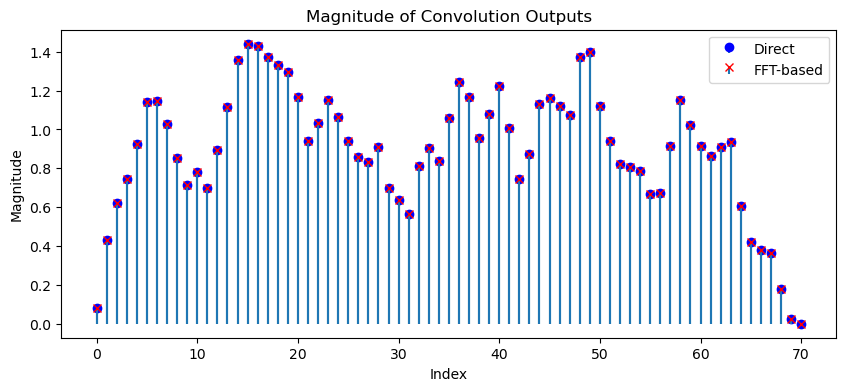

In [8]:
# Plot the results to visually verify the match
plt.figure(figsize=(10, 4))
plt.stem(np.abs(y_direct), markerfmt='bo', basefmt=" ", label='Direct')
plt.stem(np.abs(y_fft), markerfmt='rx', basefmt=" ", label='FFT-based')
plt.title('Magnitude of Convolution Outputs')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.legend()
plt.show()